## Medical Insurance Cost Prediction

In [ ]:
'''
Main steps to be followed:

1) Setting up the data
2) Creating the model
3) Training the model
4) Prediction
'''

'\nMain steps to be followed:\n\n1) Setting up the data\n2) Creating the model\n3) Training the model\n4) Prediction\n'

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing Linear Regression Model
from sklearn.linear_model import LinearRegression

In [ ]:
#Importing Accuracy
from sklearn import metrics

In [ ]:
#Importing train test split function
from sklearn.model_selection import train_test_split

### Data Collection & Analysis

In [ ]:
insurance_ds = pd.read_csv("insurance.csv")

In [ ]:
#Displaying the first 5 rows
insurance_ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Finding number of rows & columns
insurance_ds.shape

(1338, 7)

In [ ]:
#Info of the dataset
insurance_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Finding the sum of null values
insurance_ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [ ]:
#Statistical measures of the dataset
insurance_ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-15-8c7d32117075>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_ds['age'])


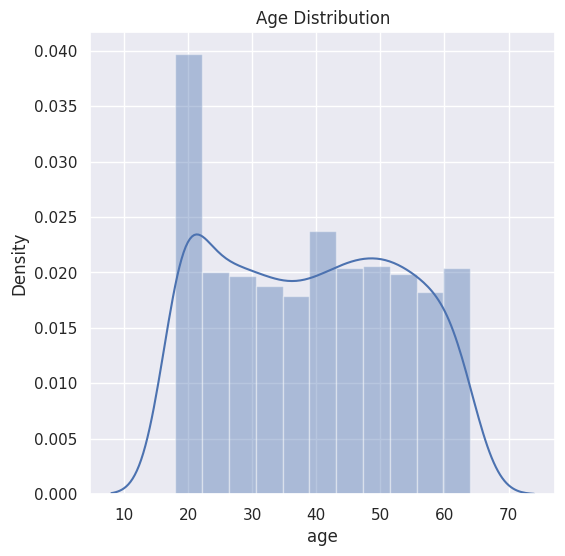

In [ ]:
#Distribution of Age Value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_ds['age'])
plt.title("Age Distribution")
plt.show()

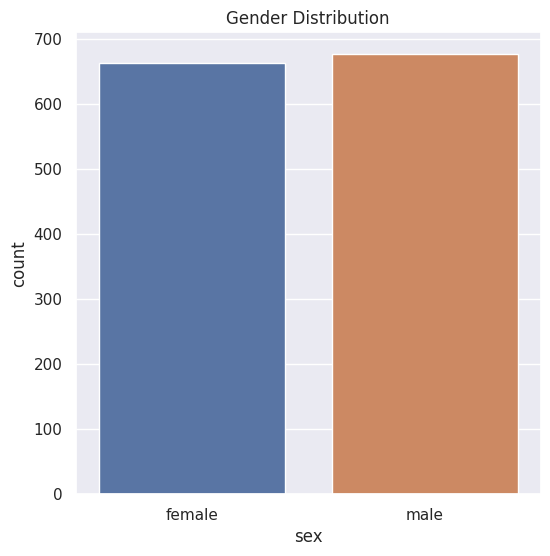

In [ ]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_ds)
plt.title("Gender Distribution")
plt.show()

<ipython-input-17-9472e2ca7c97>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_ds['bmi'])


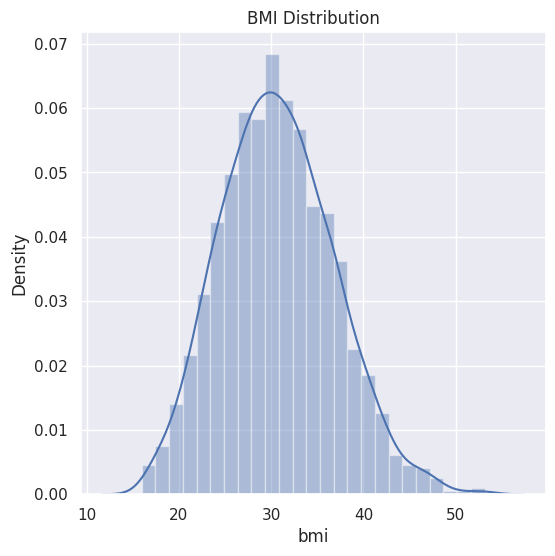

In [ ]:
#BMI Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_ds['bmi'])
plt.title("BMI Distribution")
plt.show()

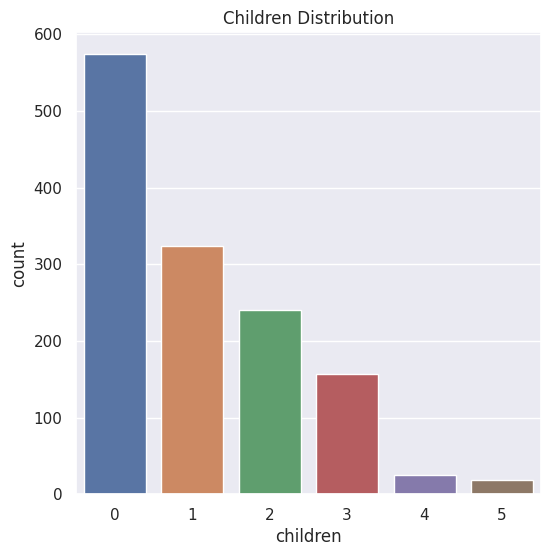

In [ ]:
#Children Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_ds)
plt.title("Children Distribution")
plt.show()

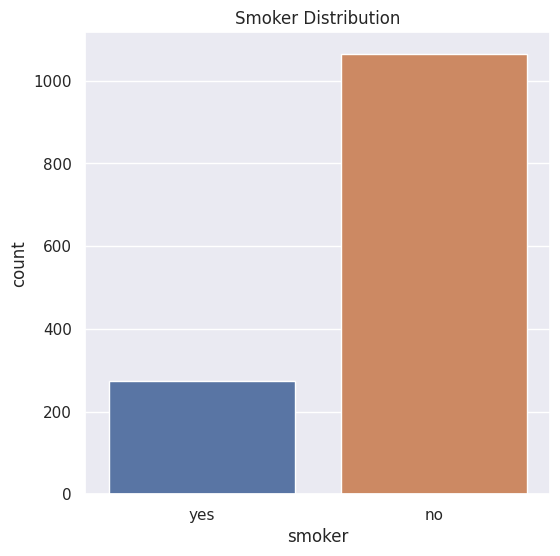

In [ ]:
#Smoker Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_ds)
plt.title("Smoker Distribution")
plt.show()

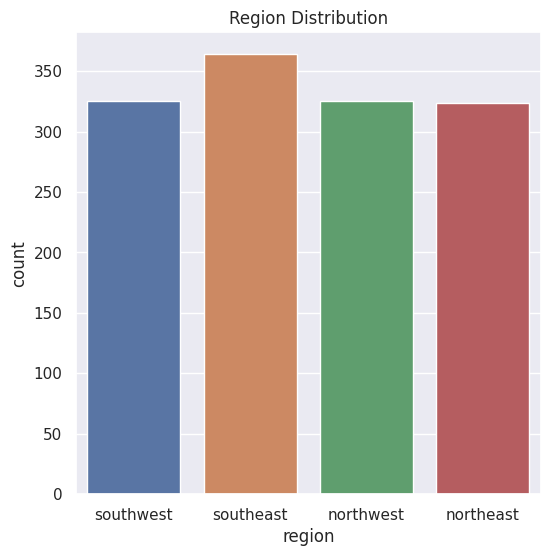

In [ ]:
#Region Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_ds)
plt.title("Region Distribution")
plt.show()

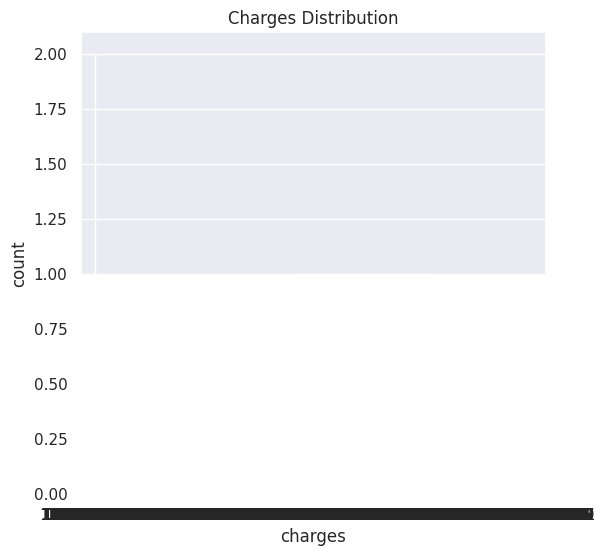

In [ ]:
#Charges Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='charges',data=insurance_ds)
plt.title("Charges Distribution")
plt.show()

### Encoding the Categorical Data

In [ ]:
#Encoding the Gender Column
#pd.unique(insurance_ds['sex'])
insurance_ds.replace({'sex':{'male':0,'female':1}}, inplace=True)
#Encoding the Smoker Column
insurance_ds.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
#Encoding the Region Column
insurance_ds.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}}, inplace=True)

In [ ]:
#Verifying the Encoded Data
insurance_ds

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


### Splitting the data into Training Data & Testing Data

In [ ]:
X = insurance_ds.drop(columns = 'charges',axis=1)
Y = insurance_ds['charges']

In [ ]:
#Printing the Input feature
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [ ]:
#Printing the Target Variable
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, Y_test.shape)

(1338, 6) (1070, 6) (268,)


### Model Training

In [ ]:
#Calling Linear Regression Model
model = LinearRegression()

In [ ]:
#Training the ML Model using training model
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
training_data_prediction = model.predict(X_train)

In [ ]:
training_data_accuracy = metrics.r2_score(Y_train,training_data_prediction)
print("Accuracy score of training data ",training_data_accuracy)

Accuracy score of training data  0.7519923667088932


In [ ]:
testing_data_prediction = model.predict(X_test)
testing_data_accuracy = metrics.r2_score(Y_test,testing_data_prediction)
print("Accuracy score of training data ",testing_data_accuracy)

Accuracy score of training data  0.7445422986536503


### Buliding A Predictive System

In [ ]:
#Changing the input data into a numpy array
input_data = (19,0,24.6,1,1,0)
#input_data = (31,0,36.3,2,0,0)
input_data_as_numpy_array = np.asarray(input_data)
#Reshape the numpy array as we are predicting for one data point
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = model.predict(input_data_reshape)
print("The cost of insurance according to the prediction: ",prediction)

The cost of insurance according to the prediction:  [747.97468776]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
